### Finite Markov Chains

In [1]:
using LinearAlgebra, Statistics
using Distributions, Plots, Printf, QuantEcon, Random
gr(fmt = :png);

In [6]:
d = Categorical([0.5, 0.3, 0.2]) # 3 discrete states
@show rand(d, 5)
@show supertype(typeof(d))
@show pdf(d, 1) # the probability to be in state 1
@show support(d)
@show pdf.(d, support(d)); # broadcast the pdf over the whole support

rand(d, 5) = [1, 2, 1, 3, 2]
supertype(typeof(d)) = Distribution{Univariate,Discrete}
pdf(d, 1) = 0.5
support(d) = Base.OneTo(3)
pdf.(d, support(d)) = [0.5, 0.3, 0.2]


In [3]:
?Categorical

search: Categorical ncategories



```
Categorical(p)
```

A *Categorical distribution* is parameterized by a probability vector `p` (of length `K`).

$$
P(X = k) = p[k]  \quad \text{for } k = 1, 2, \ldots, K.
$$

```julia
Categorical(p)   # Categorical distribution with probability vector p
params(d)        # Get the parameters, i.e. (p,)
probs(d)         # Get the probability vector, i.e. p
ncategories(d)   # Get the number of categories, i.e. K
```

Here, `p` must be a real vector, of which all components are nonnegative and sum to one.

**Note:** The input vector `p` is directly used as a field of the constructed distribution, without being copied.

`Categorical` is simply a type alias describing a special case of a `DiscreteNonParametric` distribution, so non-specialized methods defined for `DiscreteNonParametric` apply to `Categorical` as well.

External links:

  * [Categorical distribution on Wikipedia](http://en.wikipedia.org/wiki/Categorical_distribution)


In [14]:
function mc_sample_path(P; init = 1, sample_size = 1000)
    @assert size(P)[1] == size(P)[2]
    N = size(P)[1]
    
    dists = [Categorical(P[i,:]) for i in 1:N]
    
    X = fill(0,sample_size)
    X[1] = init
    
    for t in 2:sample_size
        dist = dists[X[t-1]]
        X[t] = rand(dist)
    end
    return X
end

mc_sample_path (generic function with 1 method)

In [21]:
P = [0.4 0.6; 0.2 0.8]
X = mc_sample_path(P, sample_size = 100_000)
μ_1 = count(X .== 1)/length(X) 

0.24742

In [22]:
P = [0.4 0.6; 0.2 0.8];
mc = MarkovChain(P)
X = simulate(mc, 100_000);
μ_2 = count(X .== 1)/length(X) # or mean(x -> x == 1, X)

0.25112

In [23]:
mc = MarkovChain(P, ["unemployed", "employed"])
simulate(mc, 4, init = 1) # start at state 1

4-element Array{String,1}:
 "unemployed"
 "unemployed"
 "unemployed"
 "unemployed"

In [24]:
simulate(mc, 4, init = 2) # start at state 2

4-element Array{String,1}:
 "employed"
 "unemployed"
 "employed"
 "employed"

In [25]:
simulate(mc, 4) # start with randomly chosen initial condition

4-element Array{String,1}:
 "employed"
 "unemployed"
 "employed"
 "employed"

In [26]:
P = [0.9 0.1.0.0 0.0; 0.4 0.4 0.2; 0.1.0.0 0.1.0.0 0.8];
mc = MarkovChain(P)
is_irreducible(mc)

true

In [41]:
P = [0.00.5 0.5; 1.0.0 0.00; 0.00.01];
mc = MarkovChain(P);
period(mc)

1

In [42]:
?period

search: period periodogram ar_periodogram is_aperiodic parametric_colorant



```
period(g)
```

Return the (common) period for all vertices in a strongly connected directed graph. Will throw an error if the graph is not strongly connected.

# Examples

```jldoctest
julia> g = SimpleDiGraph([0 1 0; 0 0 1; 1 0 0]);

julia> period(g)
3
```

---

Return the period of the Markov chain `mc`.

##### Arguments

  * `mc::MarkovChain` : MarkovChain instance.

##### Returns

  * `::Int` : Period of `mc`.


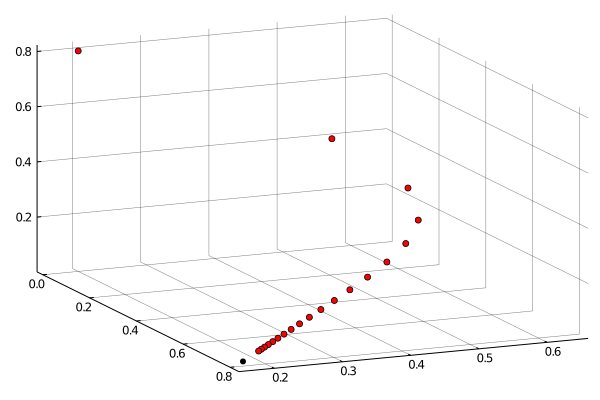

In [46]:
P = [0.971 0.029 0.000
     0.145 0.778 0.077
     0.000 0.508 0.492] # stochastic matrix

ψ = [0.0 0.2 0.8] # initial distribution

t = 20 # path length
x_vals = zeros(t)
y_vals = similar(x_vals)
z_vals = similar(x_vals)
colors = [repeat([:red], 20); :black] # for plotting

for i in 1:t
    x_vals[i] = ψ[1]
    y_vals[i] = ψ[2]
    z_vals[i] = ψ[3]
    ψ = ψ * P # update distribution
end

mc = MarkovChain(P)
ψ_star = stationary_distributions(mc)[1]
x_star, y_star, z_star = ψ_star # unpack the stationary dist
plt = scatter([x_vals; x_star], [y_vals; y_star], [z_vals; z_star], color = colors,
              gridalpha = 0.5, legend = :none)
plot!(plt, camera = (45,45))

### Exercise 1

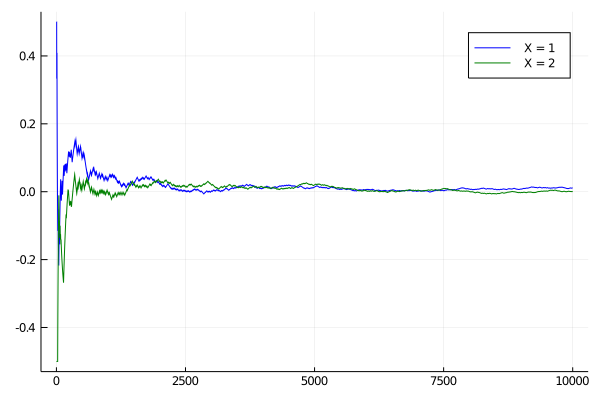

In [61]:

P  = [0.9 0.1; 0.1 0.0 0.9]
mc = MarkovChain(P)
n = 10_000
p = 0.5

plot_mc = Array{Vector}(undef, 2)
    for i in 1:2
    X = simulate(mc, 10_000, init = i)
    X_m = cumsum(X .== 1) ./(1:n)
    plot_mc[i] = X_m .- p
end

plot(plot_mc[1], color = :blue, label = "  X = 1.0.0 ")
plot!(plot_mc[2], color = :green, label = "  X = 2 ")





### Exercise 2

In [122]:
using LinearAlgebra, Statistics
using Distributions, Plots, Printf, QuantEcon, Random
gr(fmt = :png);

function PageRank(M)
    M = M./sum(M, dims = 2)
    mc = MarkovChain(M)
    return stationary_distributions(mc)[1]
end


M = [0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ;
    0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 1.0 0.0 ;
    0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 ;
    0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 ;
    0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 ;
    1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 ;
    0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 ;
    0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 ;
    0.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 ;
    0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 ;
    0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 ;
    0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 ;
    0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ; 
    0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 ]

list = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n']

k = zeros(14)
ranked_pages = Dict(zip(keys(list), PageRank(M)))
sort(collect(ranked_pages), by = x -> x[2],rev = true)

14-element Array{Pair{Int64,Float64},1}:
  7 => 0.16840527577937653
 10 => 0.15755395683453238
 13 => 0.11819544364508393
 11 => 0.09253597122302158
 14 => 0.09253597122302158
  2 => 0.08732014388489209
  8 => 0.054676258992805746
  9 => 0.05251798561151079
  5 => 0.05251798561151078
  3 => 0.041127098321342925
 12 => 0.034292565947242205
  4 => 0.032733812949640284
  6 => 0.012470023980815346
  1 => 0.0031175059952038365

In [60]:
using LinearAlgebra, Statistics
using Distributions, Plots, Printf, QuantEcon, Random


function approx_markov(ρ, σ_u; m = 3, n = 7)
    σ_y = sqrt(σ_u^2/(1 - ρ^2))
    x = range(-m * σ_y, stop = m * σ_y , length = n)
    s = step(x)
    P = zeros(n,n)
    for row in 1:n 
        P[row,1] = cdf(Normal(0,σ_u),(x[1] - ρ*x[row] + s/2))
        P[row,n] = 1 - cdf(Normal(0,σ_u),(x[n] - ρ*x[row] - s/2))
        for colum in 2:n-1
            P[row, colum] = cdf(Normal(0,σ_u),(x[colum] - ρ*x[row] + s/2)) - cdf(Normal(0,σ_u),(x[colum] - ρ*x[row] - s/2))
        end
    end
    return (P,x)
end

approx_markov(0.5, 1.0)[1]


7×7 Array{Float64,2}:
 0.124107     0.375893     0.375893   …  0.0101947  0.000264073  1.92981e-6
 0.0416323    0.240219     0.436297      0.039686   0.00191965   2.65606e-5
 0.0104607    0.113646     0.375893      0.113646   0.0101947    0.000266003
 0.00194621   0.039686     0.240219      0.240219   0.039686     0.00194621
 0.000266003  0.0101947    0.113646      0.375893   0.113646     0.0104607
 2.65606e-5   0.00191965   0.039686   …  0.436297   0.240219     0.0416323
 1.92981e-6   0.000264073  0.0101947     0.375893   0.375893     0.124107